In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
OKABE_ITO_SCALE = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


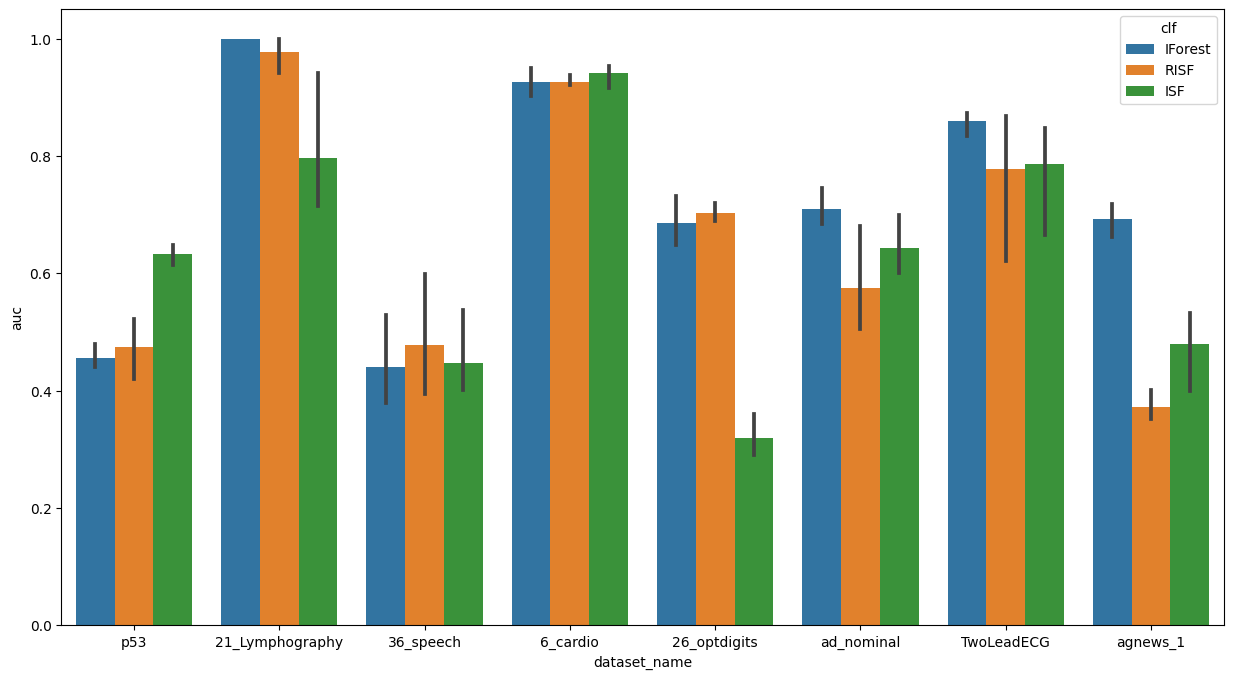

In [3]:
df = pd.read_csv('../results/results_default.csv')
sns.barplot(data=df, x="dataset_name", y="auc", hue="clf")
plt.gcf().set_size_inches(15, 8) # We don't need to check Isolation forest, maybe just for debugging.

In [2]:
def sensitivity_plot(csv_path, parameter_name):
    results = pd.read_csv(csv_path)
    sns.set_palette(sns.color_palette(OKABE_ITO_SCALE))
    g = sns.relplot(data=results, x=parameter_name, y="auc", hue="clf", marker="o", col="dataset_name", col_wrap=4, 
                facet_kws={'sharey': False, 'sharex': False}, kind="line")
    g.set(ylim=(0, 1))
    g.fig.suptitle(f'influence of {parameter_name} on AUC')
    plt.gcf().set_size_inches(20, 10)

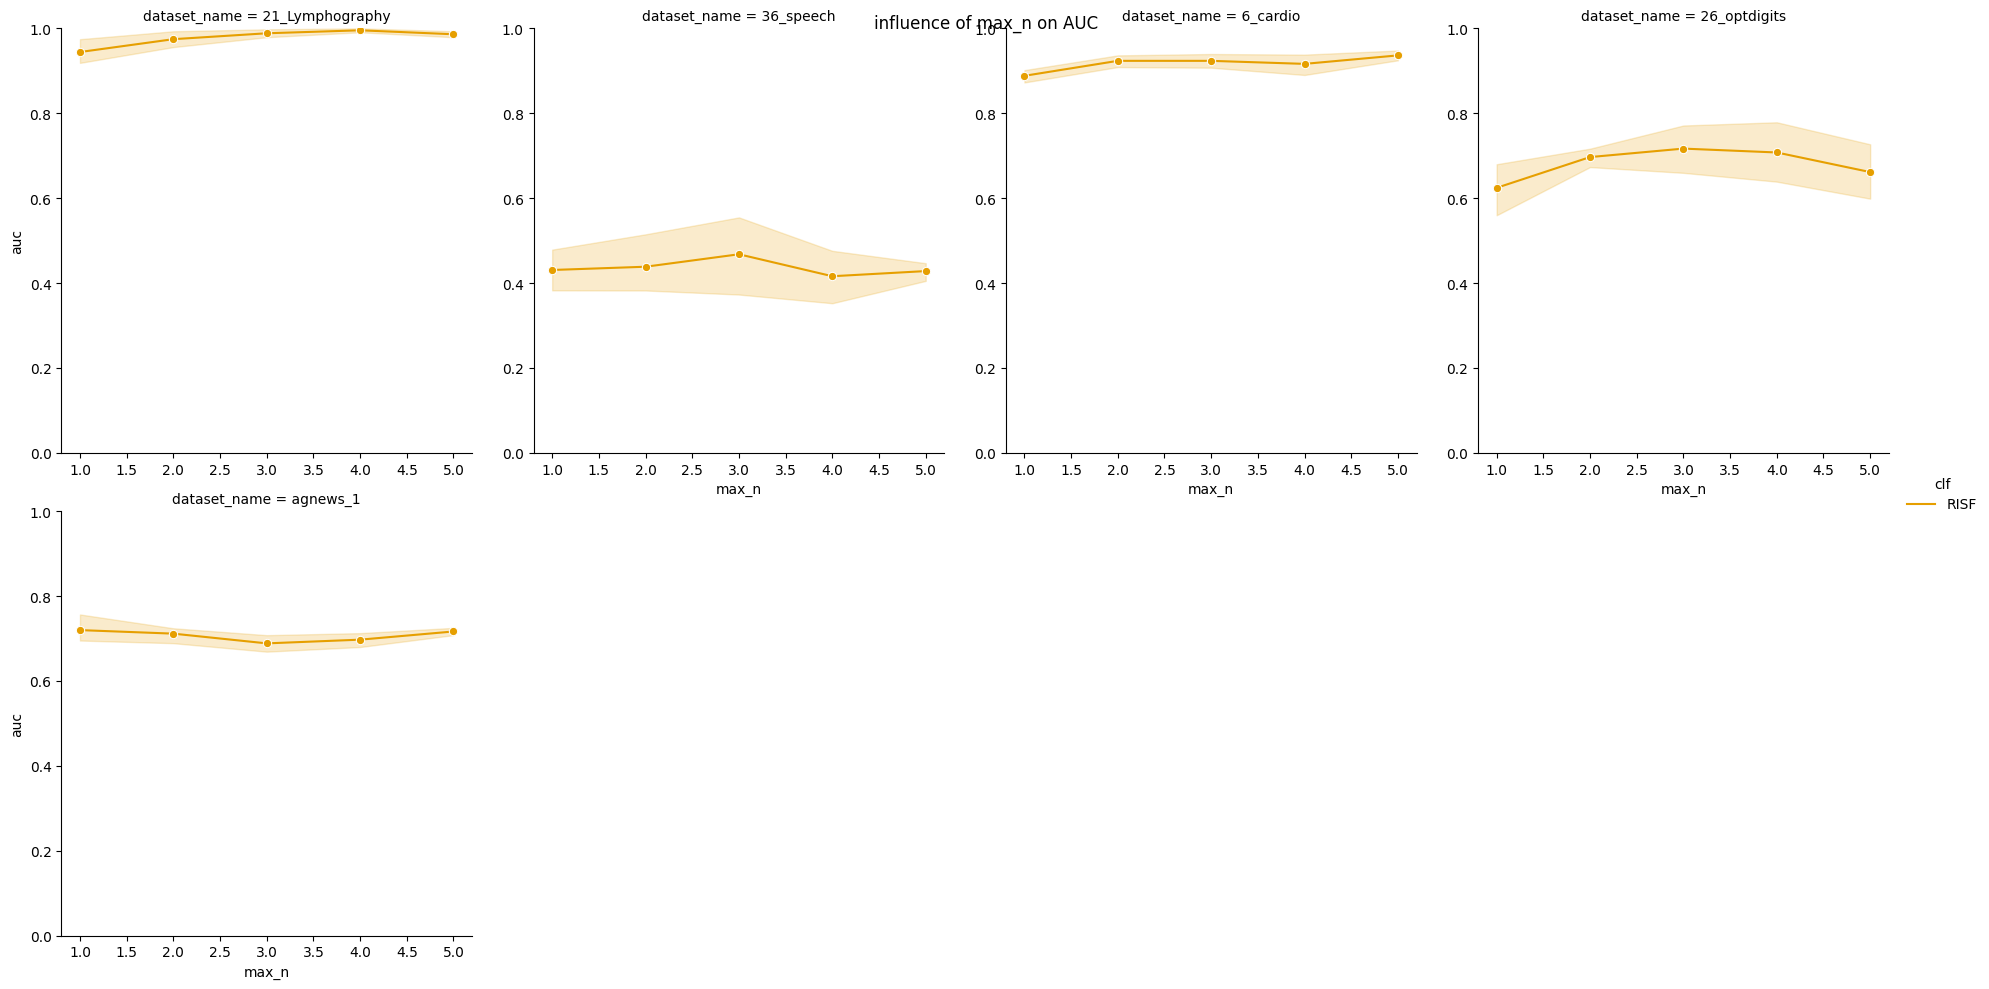

In [4]:
sensitivity_plot("../results/results_max_n.csv", "max_n")

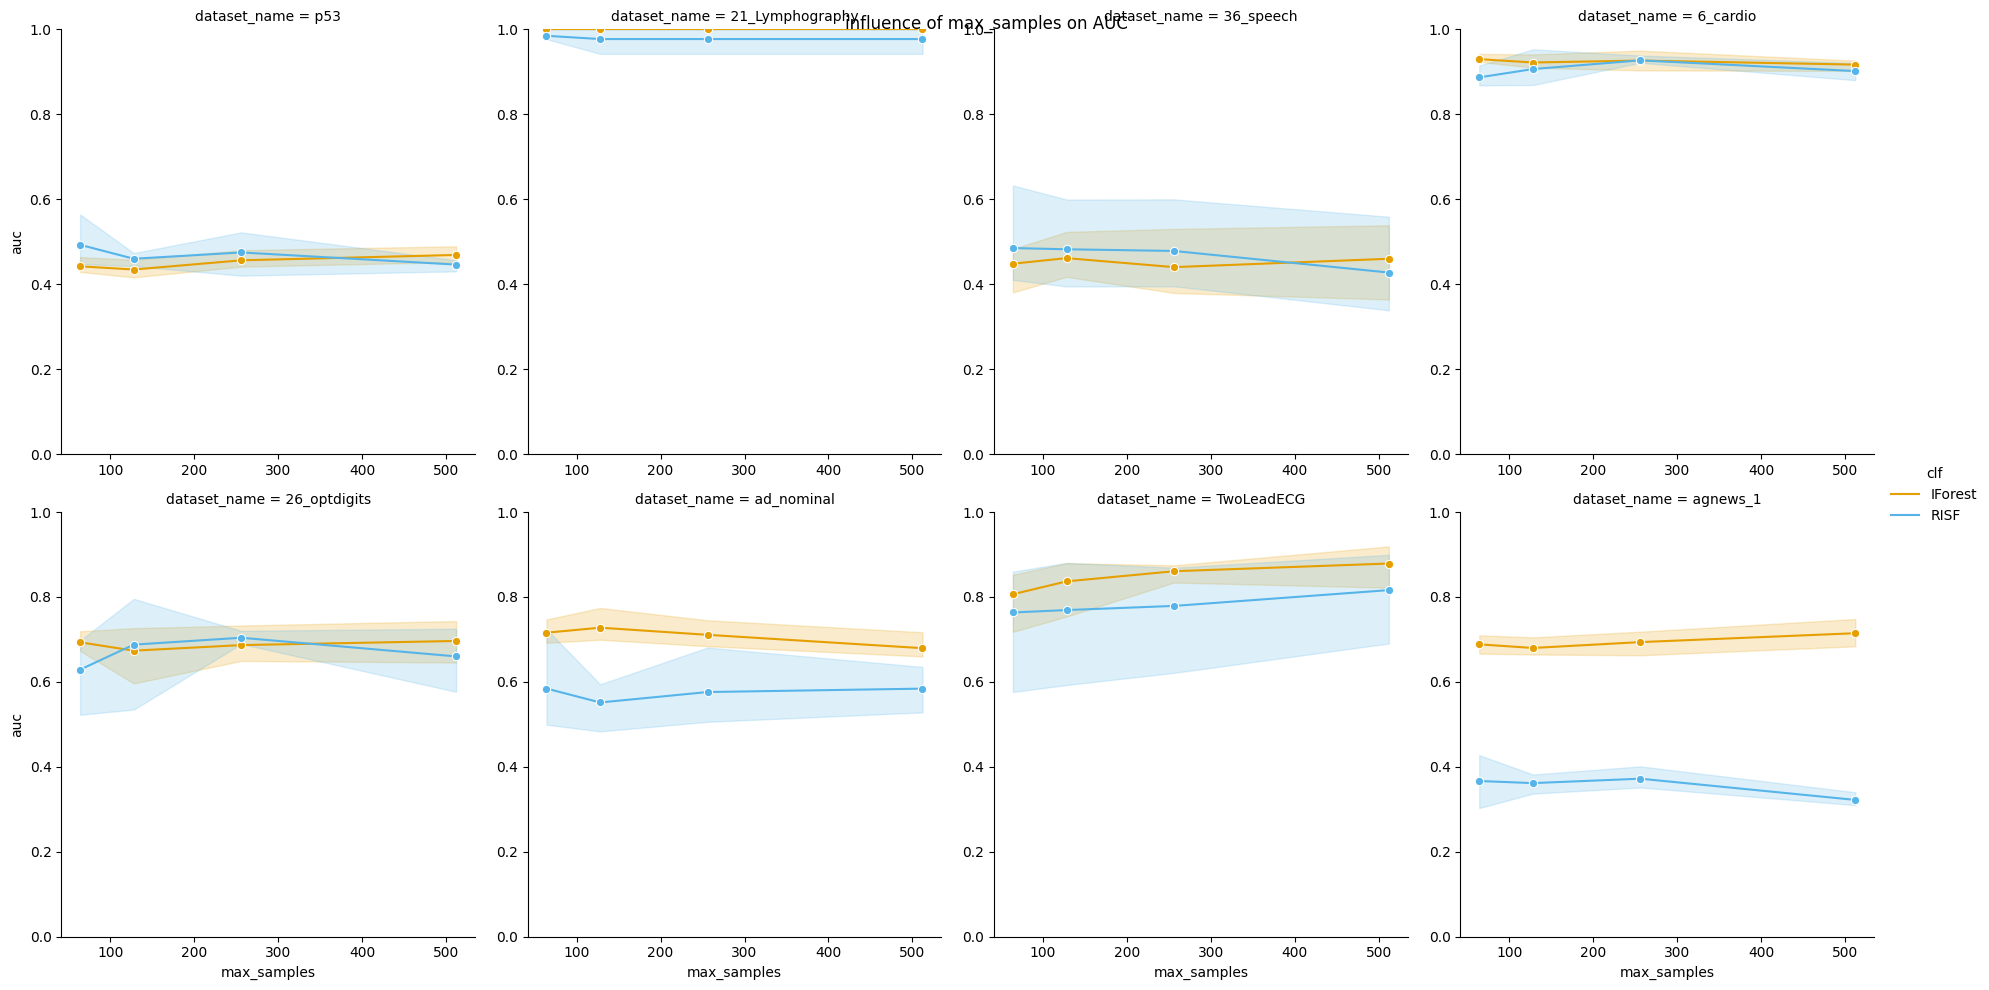

In [13]:
sensitivity_plot("../results/results_max_samples.csv", "max_samples")

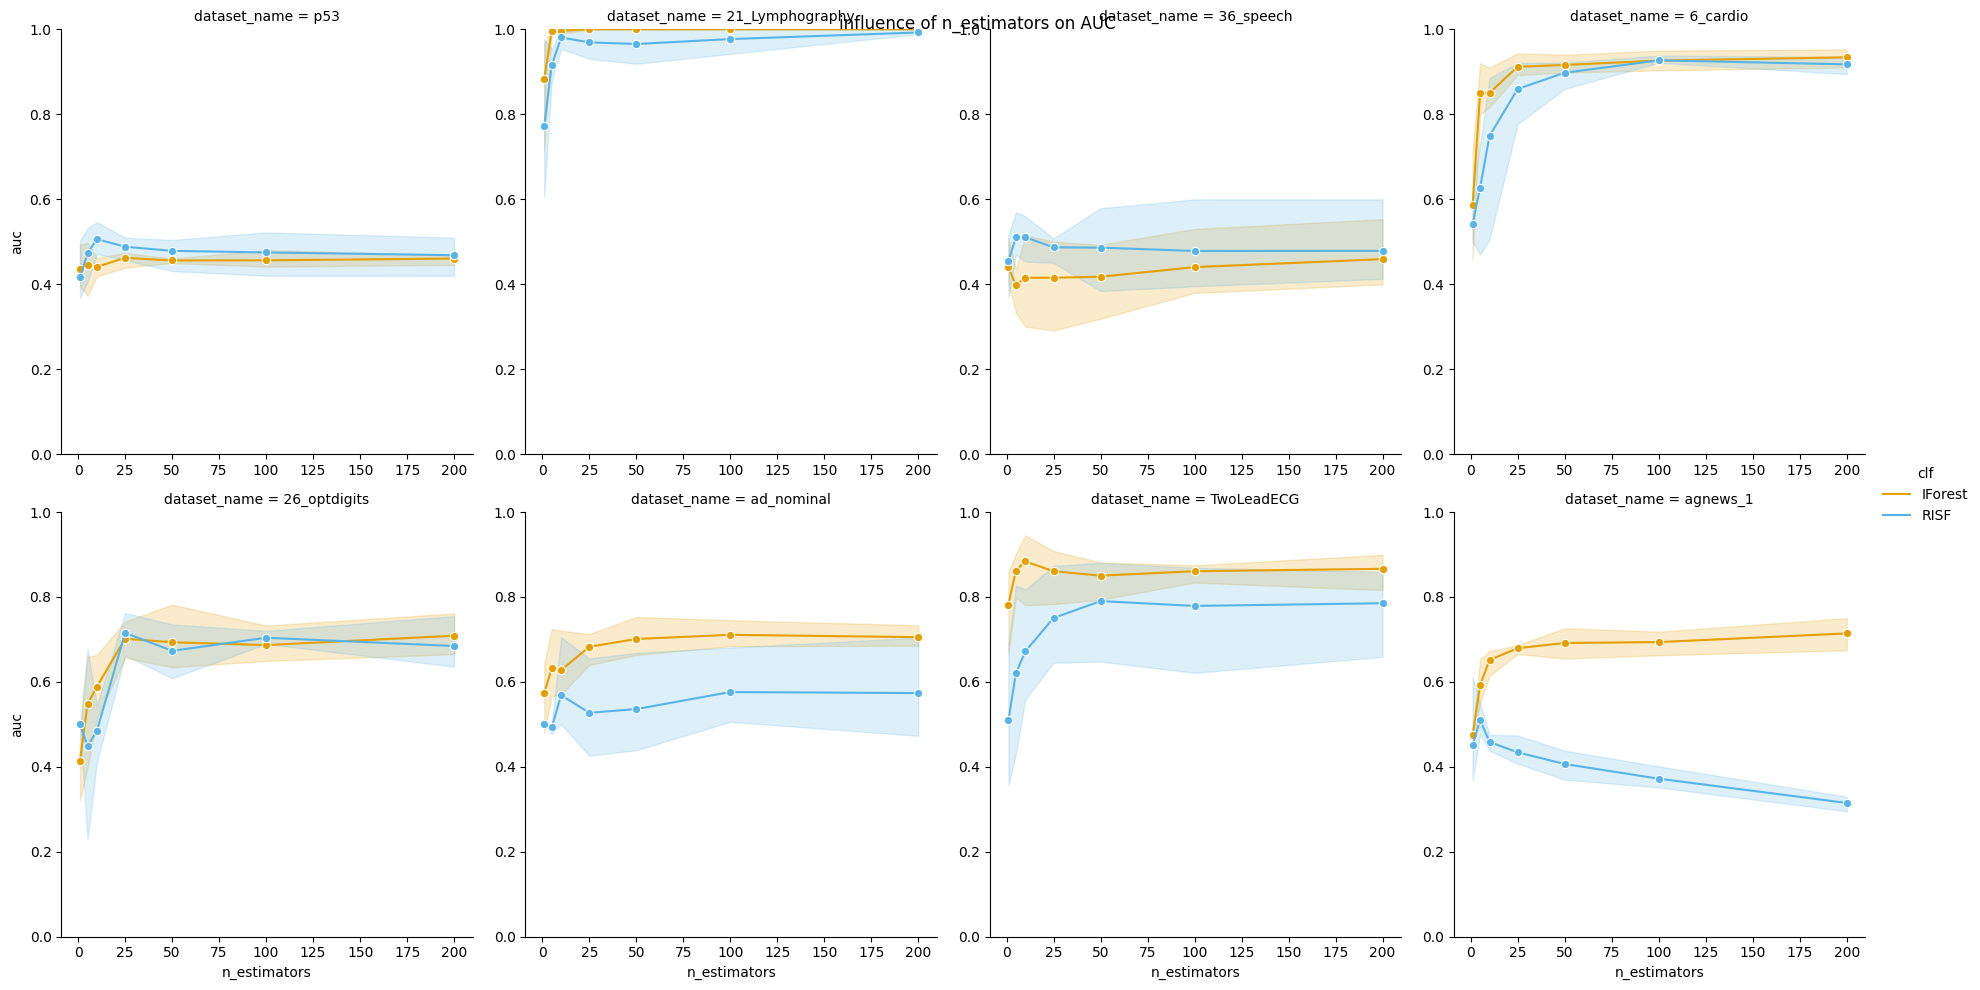

In [15]:
sensitivity_plot("../results/results_n_estimators.csv", "n_estimators")

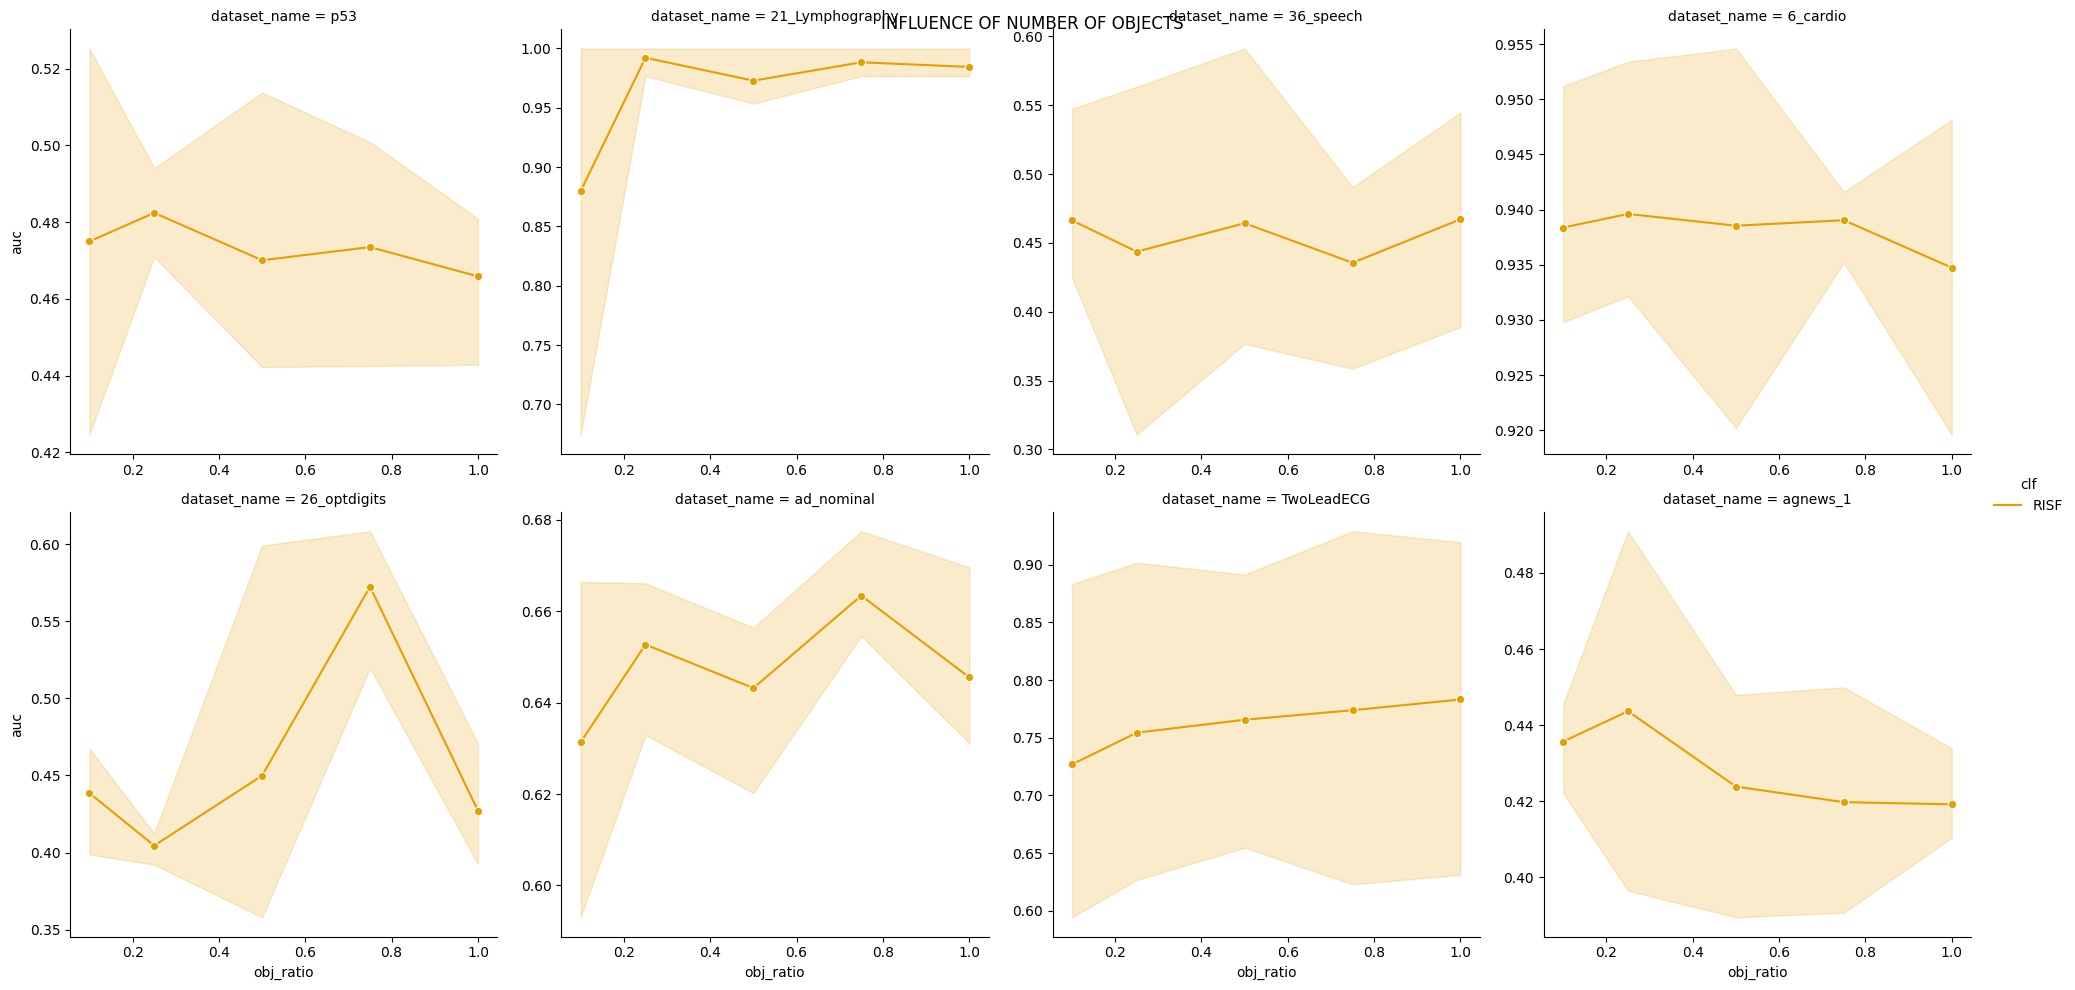

In [20]:
results_df = pd.read_csv("../results/results_selected_obj_Ratio.csv")
sns.set_palette(sns.color_palette(OKABE_ITO_SCALE))
g = sns.relplot(data=results_df, x="obj_ratio", y="auc", hue="clf", marker="o", col="dataset_name", col_wrap=4, 
            facet_kws={'sharey': False, 'sharex': False}, kind="line")

g.fig.suptitle('INFLUENCE OF NUMBER OF OBJECTS')
sns.despine()

In [58]:
import numpy as np
def plot_top_n_dists(results, n=7):
    grouped = results.groupby(['dataset_name', 'distances']) 
    grouped_mean = grouped.mean().reset_index()
    datasets = grouped_mean.dataset_name.unique()
    fig, ax = plt.subplots(1, len(datasets),  figsize=(10 * len(datasets), 10))
    
    if not isinstance(ax, np.ndarray):
        ax = [ax]

    for i in range(0, len(datasets)):
        dataset_name = grouped_mean.dataset_name.unique()[i]
        top_n_dists = grouped_mean[grouped_mean.dataset_name == dataset_name].sort_values(by=['auc'], ascending=False).head(n).distances.values

        to_plot = results[results.dataset_name == dataset_name]
        to_plot = to_plot[to_plot.distances.isin(top_n_dists)]
        
        to_plot["index"] = to_plot["distances"].apply(lambda x: list(top_n_dists).index(x))
        to_plot = to_plot.sort_values(by=['index'])
        sns.barplot(data=to_plot, x="distances", y="auc", ax=ax[i])
        ax[i].set_title(dataset_name)
        ax[i].tick_params(labelrotation=45)
        
    fig.suptitle("Different distance functions combinations comparisons")
    

C:\Users\sebas\AppData\Local\Temp\ipykernel_14164\2342810185.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean = grouped.mean().reset_index()


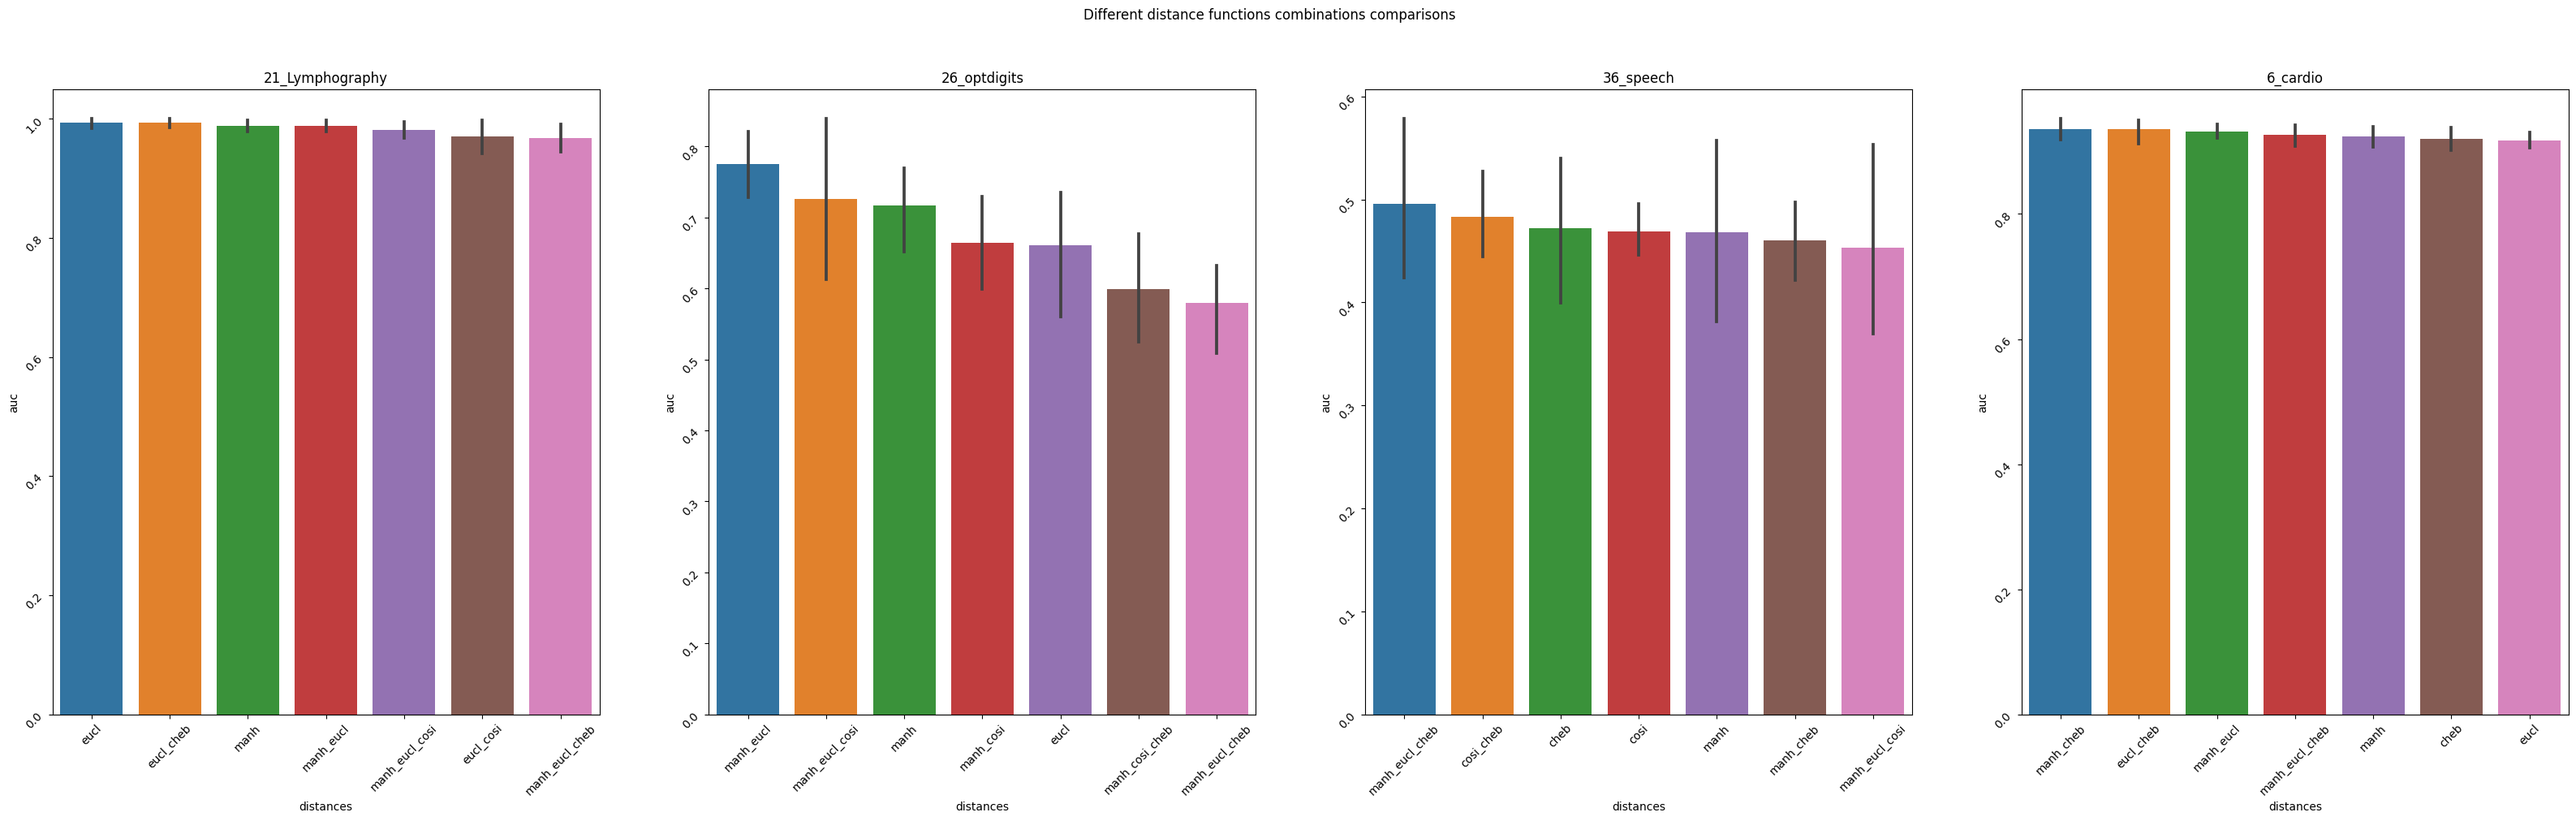

In [47]:
num_df = pd.read_csv("../results/results_selected_distances_numerical.csv")
plot_top_n_dists(num_df)

C:\Users\sebas\AppData\Local\Temp\ipykernel_14164\2007289109.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean = grouped.mean().reset_index()


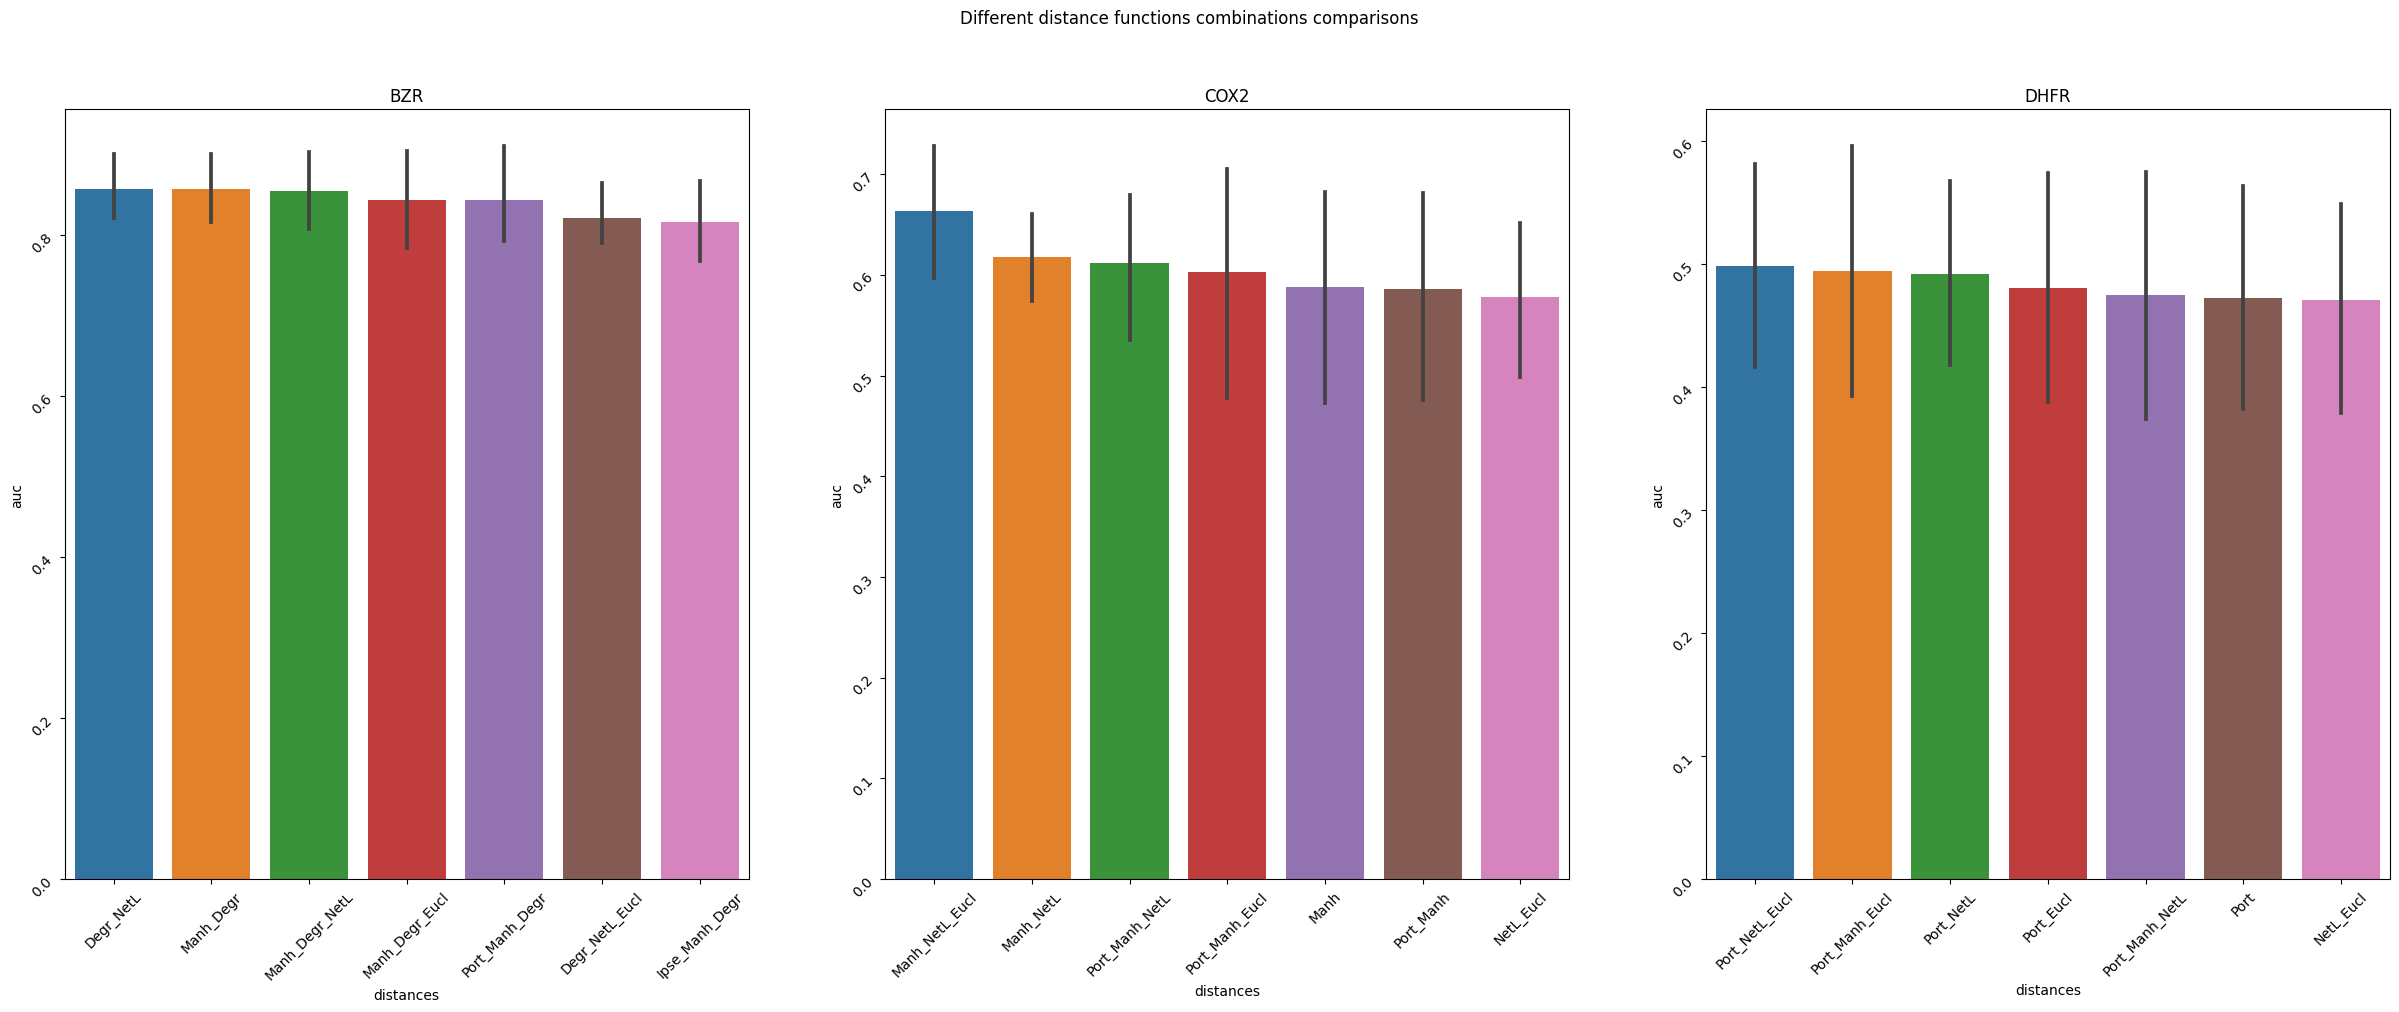

In [54]:
num_df = pd.read_csv("../results/results_selected_distances_graph.csv")
plot_top_n_dists(num_df)

C:\Users\sebas\AppData\Local\Temp\ipykernel_14164\2007289109.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean = grouped.mean().reset_index()


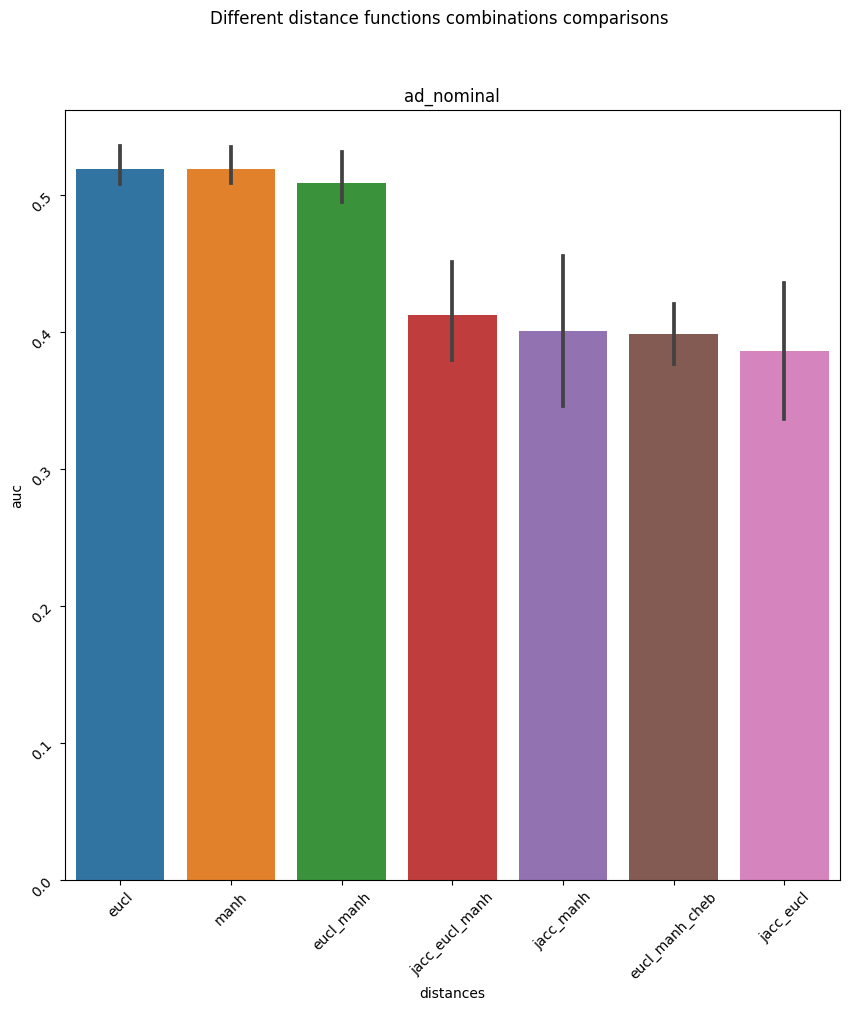

In [61]:
num_df = pd.read_csv("../results/results_selected_distances_binary_big_vectors.csv")
plot_top_n_dists(num_df)

C:\Users\sebas\AppData\Local\Temp\ipykernel_14164\2007289109.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean = grouped.mean().reset_index()


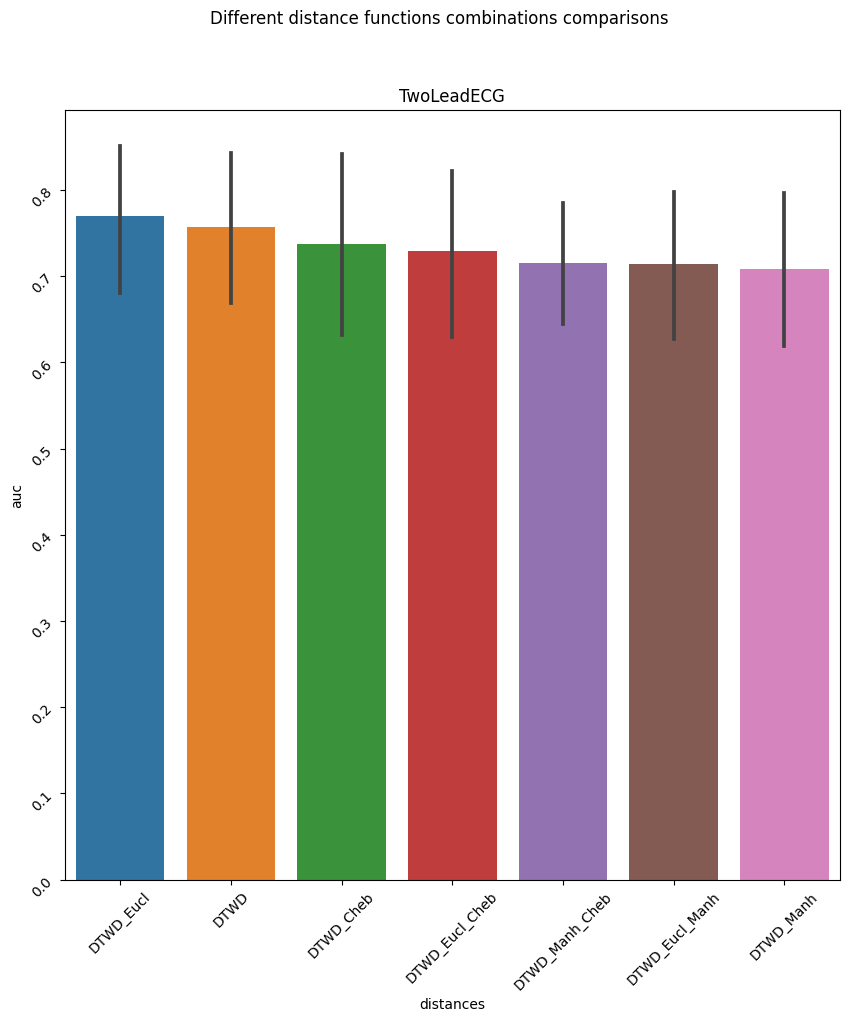

In [63]:
num_df = pd.read_csv("../results/results_selected_distances_timeseries_entire.csv")
plot_top_n_dists(num_df)

C:\Users\sebas\AppData\Local\Temp\ipykernel_14164\2007289109.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean = grouped.mean().reset_index()


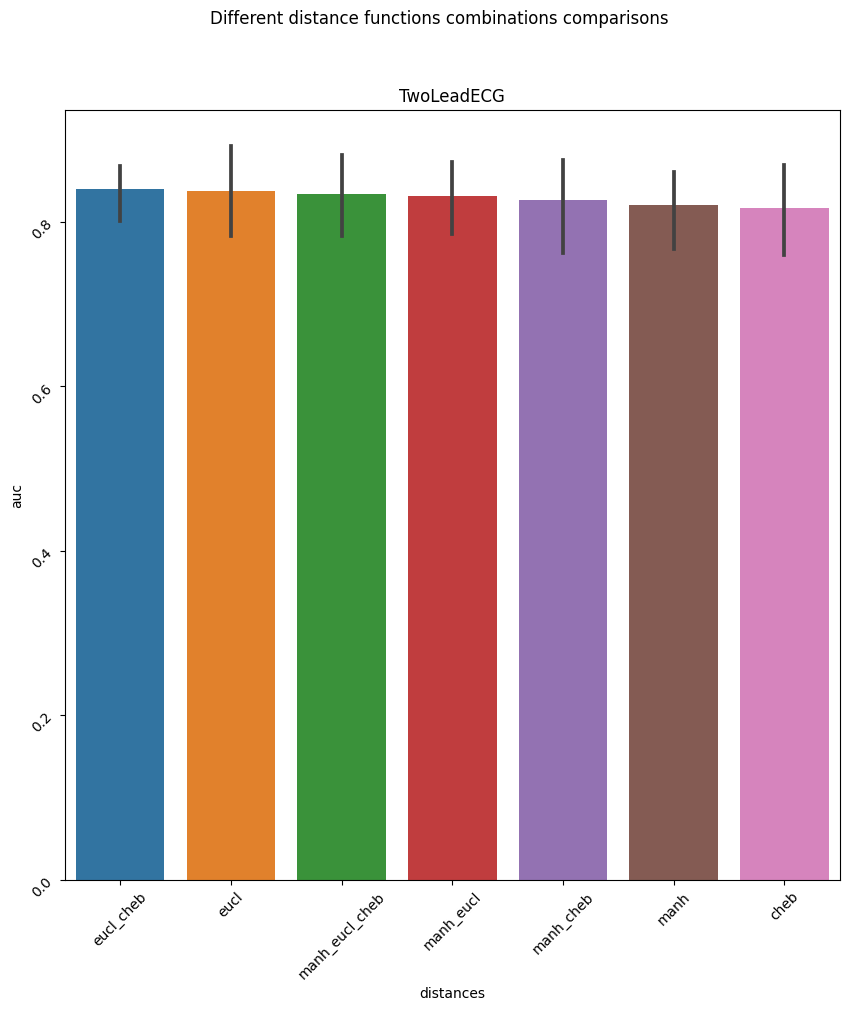

In [62]:
num_df = pd.read_csv("../results/results_selected_distances_timeseries.csv")
plot_top_n_dists(num_df)

C:\Users\sebas\AppData\Local\Temp\ipykernel_14164\2007289109.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean = grouped.mean().reset_index()


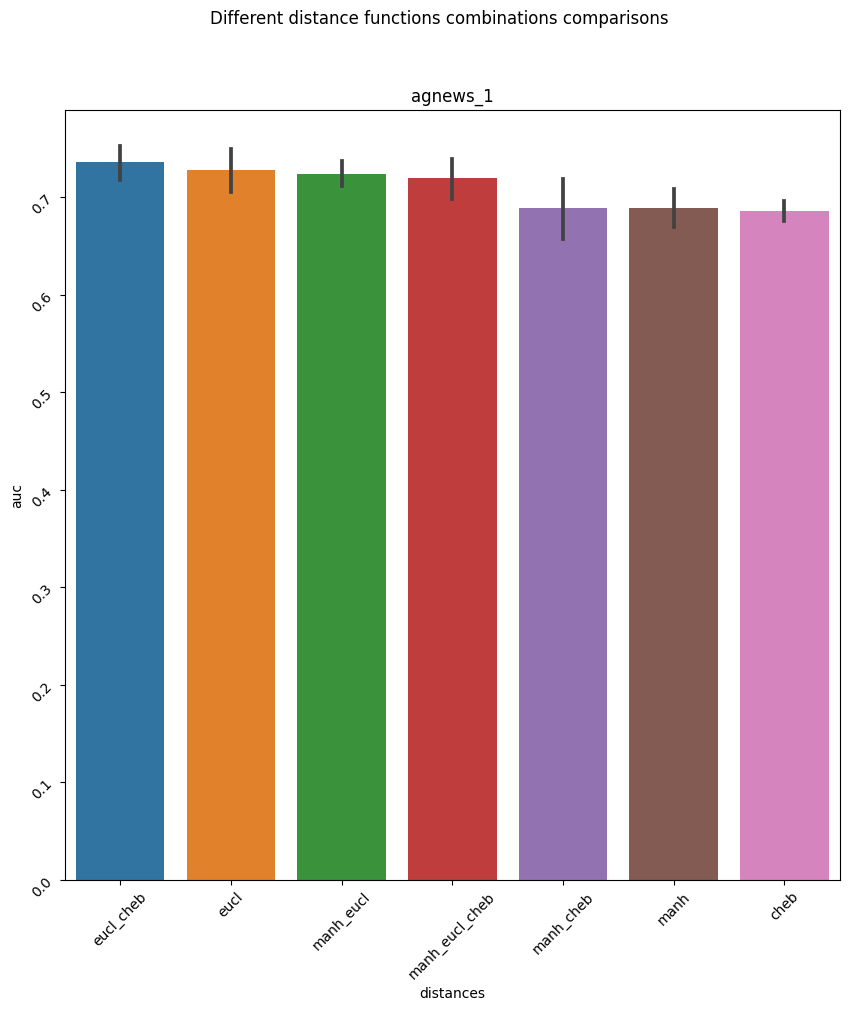

In [64]:
num_df = pd.read_csv("../results/results_selected_distances_nlp.csv")
plot_top_n_dists(num_df)